In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import lmfit
import spectral_density_functions as sdf

In [2]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\turbulent thomson"
trace=plt.imread('trace.png')

C:\Users\jdhare\Google Drive\MAGPIE\turbulent thomson


In [78]:
t=trace.sum(axis=2)
t=t.transpose()

d=[np.where(tt<2)[0] for tt in t]
dd=[]
for i, ddd in enumerate(d):
    try:
        dd.append((ddd[0]+ddd[-1])/2)
    except IndexError:
        dd.append(dd[i-1])

dd=np.array(dd)

<IPython.core.display.Javascript object>


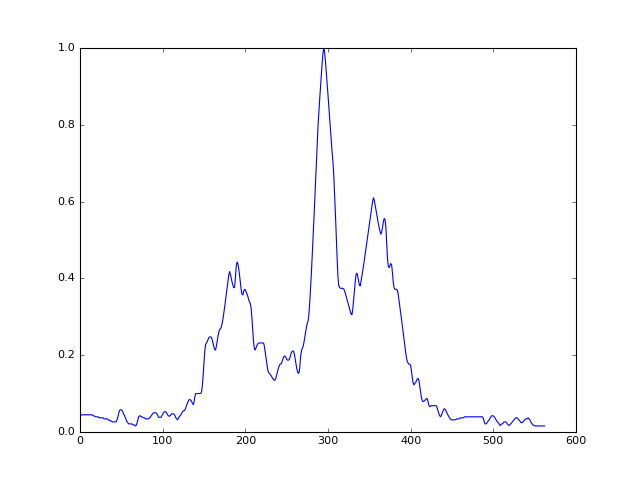

In [79]:
I=trace.shape[0]-dd
I=I/I.max()
lamb=np.linspace(525.5,527.5,trace.shape[1])
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(I)

In [192]:
#slive out non-background parts
sli=np.array(list(range(0,100))+list(range(278,313))+list(range(450,560)))

stray=I[sli]
l=lamb[sli]

#fit with Gaussian + background

GaussMod=lmfit.models.GaussianModel()
LorenMod=lmfit.models.LorentzianModel()
ConstMod=lmfit.models.ConstantModel()
#mod=GaussMod+ConstMod
#pars =  GaussMod.make_params(sigma=0.5, amplitude=400, center=526.5)
mod=LorenMod+ConstMod
pars =  LorenMod.make_params(sigma=0.5, amplitude=400, center=526.5)

pars += ConstMod.make_params(c=17)

out  = mod.fit(stray,pars,x=l)

response=out.eval(x=lamb,c=0)

In [195]:
out.best_values

{'amplitude': 0.15194793640332466,
 'c': 0.029416651112775208,
 'center': 526.5524403639579,
 'sigma': 0.050330482777887875}

<IPython.core.display.Javascript object>


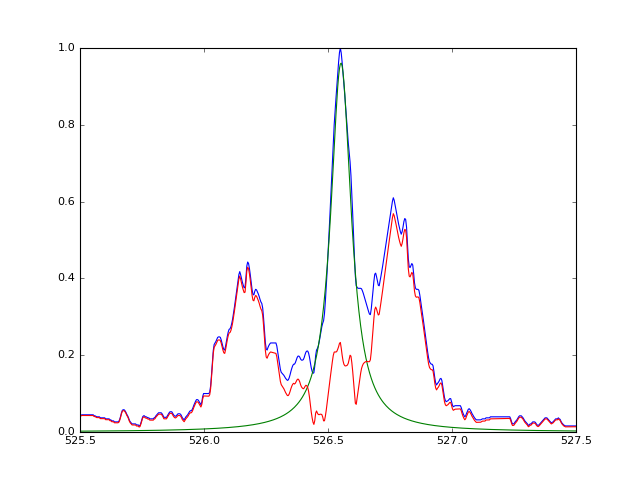

In [193]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(lamb, I)
ax.plot(lamb,out.eval(x=lamb))
ax.plot(lamb,I-0.8*response)

<IPython.core.display.Javascript object>


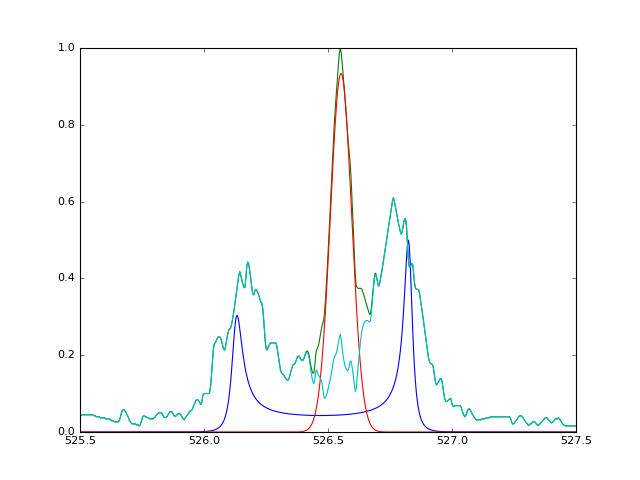

In [82]:
T_e=450
T_i=450
theta=63
n_e=1e20
A=6.5
Z=3.5

params={'T_e':450,
        'T_i':450,
        'theta':63,
        'n_e':1e20,
        'A':12,
        'Z':6,
        'v_fi':-40e3,
        'v_fe':200e3
        }

l0=out.best_values['center']
skw=sdf.S_k_omega(lambda_range=lamb*1e-9, lambda_in=l0*1e-9, **params)

fig,ax=plt.subplots(figsize=(8,6))
ax.plot(lamb,0.5*skw)
ax.plot(lamb, I)
ax.plot(lamb,out.eval(x=lamb))
ax.plot(lamb,I-0.8*out.eval(x=lamb))

[[Model]]
    Model(S_k_omega)
[[Fit Statistics]]
    # function evals   = 41
    # data points      = 563
    # variables        = 2
    chi-square         = 29.082
    reduced chi-square = 0.052
    Akaike info crit   = -1664.251
    Bayesian info crit = -1655.585
[[Variables]]
    T_e:    452.499206 +/- 5.889531 (1.30%) (init= 450)
    T_i:    452.499206 +/- 5.889531 (1.30%)  == 'T_e'
    v_fe:   1.8000e+05 +/- 0        (0.00%)  == '180e3'
    v_fi:  -40046.1140 +/- 1.21e+03 (3.02%) (init=-40000)
[[Correlations]] (unreported correlations are <  0.100)
    C(T_e, v_fi)                 = -0.525 



<IPython.core.display.Javascript object>


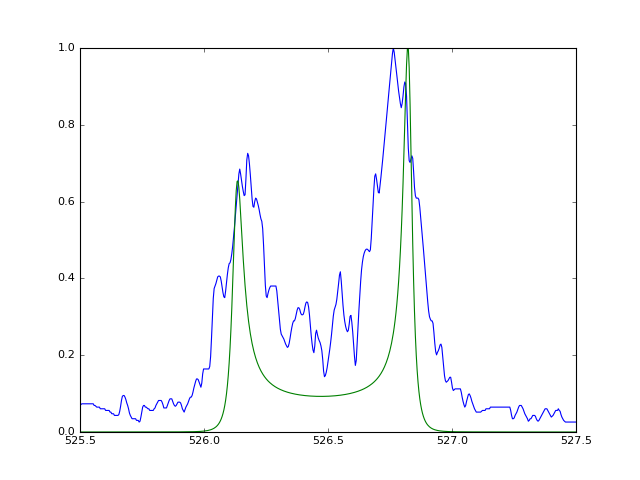

In [87]:
iv={'lambda_in':l0*1e-9,
    'lambda_range':lamb*1e-9,
    'theta':63,
    'n_e':7e19,
    'A':12,
    'Z':6,
    }

I_sig=I-0.8*out.eval(x=lamb)
I_sig=I_sig/I_sig.max()

skw_mod=lmfit.Model(sdf.S_k_omega, independent_vars=iv.keys())
skw_mod.set_param_hint('T_e', value = 450, min=0)
skw_mod.set_param_hint('T_i',value=90,min=0, expr='T_e')
skw_mod.set_param_hint('v_fi', value = -40e3)
skw_mod.set_param_hint('v_fe', value = 200e3, expr='180e3')
skw_res=skw_mod.fit(I_sig, **iv)
print(skw_res.fit_report())
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(lamb,I_sig)
ax.plot(lamb,skw_res.best_fit)

In [88]:
lambda_background_peak=response.argmax()

take=min(lambda_background_peak,response.shape[0]-lambda_background_peak)
resp=response[lambda_background_peak-take:lambda_background_peak+take]
I_c=I[lambda_background_peak-take:lambda_background_peak+take]
l_c=lamb[lambda_background_peak-take:lambda_background_peak+take]

I_sc=I_c-0.8*resp

<IPython.core.display.Javascript object>


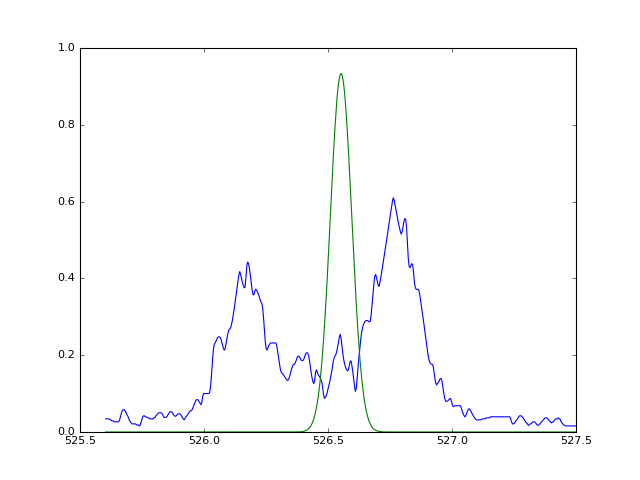

In [89]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(l_c, I_sc)
ax.plot(l_c, resp)

In [ ]:
##Fit without using convolution

skw_mod=lmfit.Model(sdf.S_k_omega, independent_vars=iv.keys())
skw_mod.set_param_hint('T_e', value = 450, min=0)
skw_mod.set_param_hint('T_i',value=90,min=0, expr='T_e')
skw_mod.set_param_hint('v_fi', value = -40e3)
skw_mod.set_param_hint('v_fe', value = 200e3, expr='180e3')
skw_mod.set_param_hint('c', value = 0.4)

skw_res=skw_mod.fit(I_sc, **iv)


[[Model]]
    Model(Skw_stray_light_convolve)
[[Fit Statistics]]
    # function evals   = 45
    # data points      = 534
    # variables        = 6
    chi-square         = 0.936
    reduced chi-square = 0.002
    Akaike info crit   = -3377.281
    Bayesian info crit = -3351.599
[[Variables]]
    T_e:      435.452151 +/- 3.953015 (0.91%) (init= 400)
    v_fe:     2.7431e+05 +/- 1.79e+04 (6.53%) (init= 200000)
    T_i:      435.452151 +/- 3.953015 (0.91%)  == 'T_e'
    v_fi:    -46358.5080 +/- 820.7622 (1.77%) (init=-40000)
    stry:     0.72512495 +/- 0.010013 (1.38%) (init= 0.5)
    amp:      0.54141135 +/- 0.008890 (1.64%) (init= 0.3)
    offset:   0.01480725 +/- 0.002620 (17.70%) (init= 0.03)
[[Correlations]] (unreported correlations are <  0.100)
    C(v_fe, amp)                 =  0.542 
    C(T_e, v_fi)                 = -0.453 
    C(amp, offset)               = -0.420 
    C(v_fe, v_fi)                = -0.238 
    C(stry, offset)              = -0.202 
    C(v_fe, offset)    

<IPython.core.display.Javascript object>


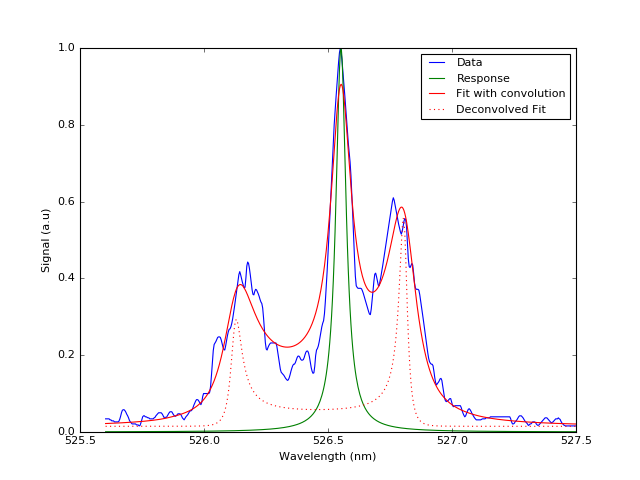

In [201]:
def Skw_stray_light_convolve(lambda_range, lambda_in, response, theta,  Z, n_e, T_e, v_fe, A, T_i, v_fi, stry, amp,offset):
    skw=sdf.S_k_omega(lambda_range, lambda_in, theta, A, T_e,T_i,n_e,Z, v_fi, v_fe)
    skw_conv=sdf.convolve(skw, response)
    skw_conv_stray=amp*skw_conv/skw_conv.max()+stry*response/response.max()+offset
    return skw_conv_stray

out  = mod.fit(stray,pars,x=l)
r=out.eval(x=l_c, c=0, amp=1)

iv={'lambda_in':l0*1e-9,
    'lambda_range':l_c*1e-9,
    'theta':63,
    'n_e':7e19,
    'A':12,
    'Z':6,
    }

ivc=dict(iv, **{'response':r})


##Fit using convolution
skwc_mod=lmfit.Model(Skw_stray_light_convolve, independent_vars=ivc.keys())
skwc_mod.set_param_hint('T_e', value = 400, min=0)
skwc_mod.set_param_hint('T_i', value=450,min=0, expr='T_e')
skwc_mod.set_param_hint('v_fi', value = -40e3)
skwc_mod.set_param_hint('v_fe', value = 200e3)
skwc_mod.set_param_hint('amp', value = 0.3,min=0)
skwc_mod.set_param_hint('stry', value = 0.5,min=0)
skwc_mod.set_param_hint('offset', value = 0.03,min=0)
skwc_res=skwc_mod.fit(I_c, **ivc)

##Unconvolved spectra for fit using convolution
skw_uc=skwc_res.best_values['amp']*skw_mod.eval(**dict(skwc_res.best_values, **iv))+skwc_res.best_values['offset']


out  = mod.fit(stray,pars,x=l)
r=out.eval(x=l_c, c=0, amp=1,sigma=0.025)

skw_c025=skwc_mod.eval(**dict(skwc_res.best_values, **ivc))


print(skwc_res.fit_report())
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(l_c,I_c, label='Data')
ax.plot(l_c,r/r.max(), label='Response')
ax.plot(l_c,skwc_res.best_fit, label='Fit with convolution', c='r')
ax.plot(l_c,skw_uc, label='Deconvolved Fit', c='r', ls=':')
#ax.plot(l_c,0.6*skw_res.best_fit, label='Fit w/o convolution', c='cyan')

ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Signal (a.u)')

In [198]:
fig.savefig('Tzeferacos_2017_thomson_convolution_lorentzian.png')

[[Model]]
    Model(Skw_stray_light_convolve)
[[Fit Statistics]]
    # function evals   = 45
    # data points      = 534
    # variables        = 6
    chi-square         = 0.936
    reduced chi-square = 0.002
    Akaike info crit   = -3377.281
    Bayesian info crit = -3351.599
[[Variables]]
    T_e:      435.452151 +/- 3.953015 (0.91%) (init= 400)
    v_fe:     2.7431e+05 +/- 1.79e+04 (6.53%) (init= 200000)
    T_i:      435.452151 +/- 3.953015 (0.91%)  == 'T_e'
    v_fi:    -46358.5080 +/- 820.7622 (1.77%) (init=-40000)
    stry:     0.72512495 +/- 0.010013 (1.38%) (init= 0.5)
    amp:      0.54141135 +/- 0.008890 (1.64%) (init= 0.3)
    offset:   0.01480725 +/- 0.002620 (17.70%) (init= 0.03)
[[Correlations]] (unreported correlations are <  0.100)
    C(v_fe, amp)                 =  0.542 
    C(T_e, v_fi)                 = -0.453 
    C(amp, offset)               = -0.420 
    C(v_fe, v_fi)                = -0.238 
    C(stry, offset)              = -0.202 
    C(v_fe, offset)    

<IPython.core.display.Javascript object>


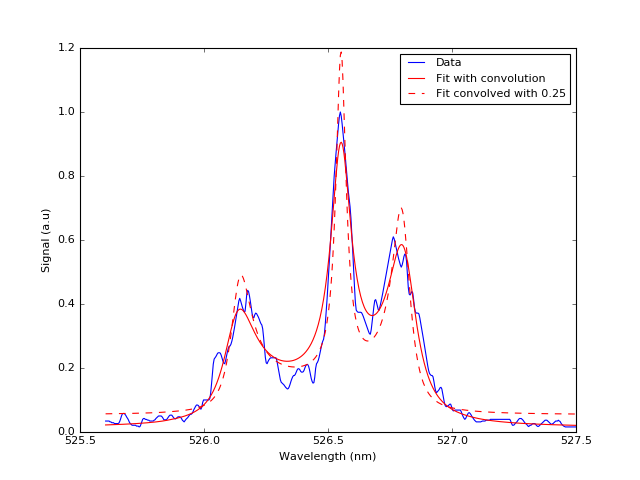

In [207]:
out  = mod.fit(stray,pars,x=l)
r=out.eval(x=l_c, c=0, amp=1)

iv={'lambda_in':l0*1e-9,
    'lambda_range':l_c*1e-9,
    'theta':63,
    'n_e':7e19,
    'A':12,
    'Z':6,
    }

ivc=dict(iv, **{'response':r})

##Fit using convolution
skwc_mod=lmfit.Model(Skw_stray_light_convolve, independent_vars=ivc.keys())
skwc_mod.set_param_hint('T_e', value = 400, min=0)
skwc_mod.set_param_hint('T_i', value=450,min=0, expr='T_e')
skwc_mod.set_param_hint('v_fi', value = -40e3)
skwc_mod.set_param_hint('v_fe', value = 200e3)
skwc_mod.set_param_hint('amp', value = 0.3,min=0)
skwc_mod.set_param_hint('stry', value = 0.5,min=0)
skwc_mod.set_param_hint('offset', value = 0.03,min=0)
skwc_05=skwc_mod.fit(I_c, **ivc)

out  = mod.fit(stray,pars,x=l)
r=out.eval(x=l_c, c=0, amp=1,sigma=0.025)
ivc=dict(iv, **{'response':r})
skwc_025=skwc_mod.fit(I_c, **ivc)

print(skwc_res.fit_report())
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(l_c,I_c, label='Data')
ax.plot(l_c,skwc_05.best_fit, label='Fit with convolution', c='r')
ax.plot(l_c,skwc_025.best_fit, label='Fit convolved with 0.25', c='r', ls='--')


ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Signal (a.u)')

In [191]:
##what is 1 eV in km/s, thermal velocity wise?
import scipy.constants as cons
A=12
T=239
np.sqrt(cons.e*T/(A*cons.m_u))

43836.813453277355

In [204]:
skw_c025

array([ 0.02204457,  0.02213332,  0.02222359,  0.02231542,  0.02240885,
        0.02250391,  0.02260065,  0.02269912,  0.02279935,  0.02290139,
        0.02300529,  0.02311109,  0.02321885,  0.02332862,  0.02344045,
        0.02355439,  0.02367051,  0.02378887,  0.02390952,  0.02403254,
        0.02415798,  0.02428592,  0.02441644,  0.02454959,  0.02468548,
        0.02482417,  0.02496574,  0.0251103 ,  0.02525793,  0.02540872,
        0.02556278,  0.02572021,  0.02588111,  0.02604561,  0.02621383,
        0.02638587,  0.02656189,  0.02674201,  0.02692637,  0.02711513,
        0.02730845,  0.0275065 ,  0.02770944,  0.02791746,  0.02813077,
        0.02834958,  0.02857409,  0.02880455,  0.0290412 ,  0.02928433,
        0.0295342 ,  0.02979114,  0.03005548,  0.03032757,  0.03060782,
        0.03089666,  0.03119456,  0.03150205,  0.03181973,  0.03214825,
        0.03248837,  0.03284096,  0.033207  ,  0.03358763,  0.03398419,
        0.03439817,  0.03483127,  0.03528523,  0.03576163,  0.03